In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
df = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/assests/voice.csv')

In [16]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [18]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [19]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [20]:
df.shape # 17 columns and 13611 rows

(3168, 21)

In [9]:
df['label'].value_counts()

,count
label,
male,1584
female,1584


In [10]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

### Class distribution:

There are 2 gender categories in 'Gender label'

The count of each Class is shown as count in Bar plot

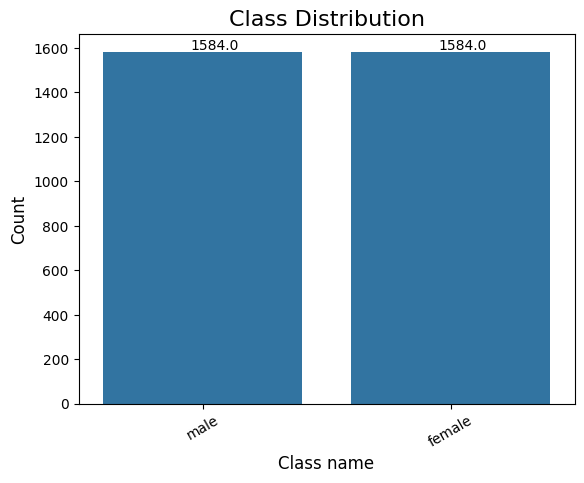

In [22]:
axes = sns.countplot(x=df['label'])
axes.set_title("Class Distribution", fontsize=16)
axes.set_xlabel("Class name", fontsize=12)
axes.set_ylabel("Count", fontsize=12)
axes.set_xticklabels(axes.get_xticklabels(), rotation=30)

for bar in axes.patches:
    axes.annotate(bar.get_height(), xy=(bar.get_x()+0.35, bar.get_height()+10))

plt.show()

### Performing EDA on Dataset

In [ ]:
labelencoder = LabelEncoder()
df['label'] = labelencoder.fit_transform(df['label'])

correlation_matrix = df.corr()
print(correlation_matrix)

          meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.53

##### Scatter Plots on features 'meanfreq' & 'median', denoting correlation between them

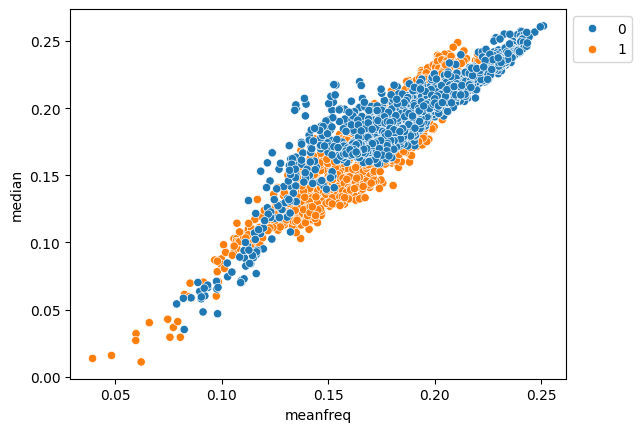

In [ ]:
sns.scatterplot(x='meanfreq', y='median',hue='label', data=df,marker='o')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

##### Scatter Plots on features 'Q25' & 'Q75', denoting correlation between them

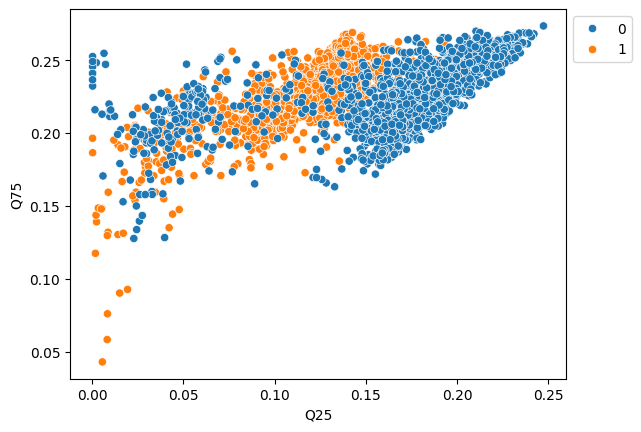

In [27]:
#0 - female; 1- male
sns.scatterplot(x='Q25', y='Q75',hue='label', data=df,marker='o')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

##### Scatter Plots on features 'meanfreq' & 'centroid', denoting correlation between them

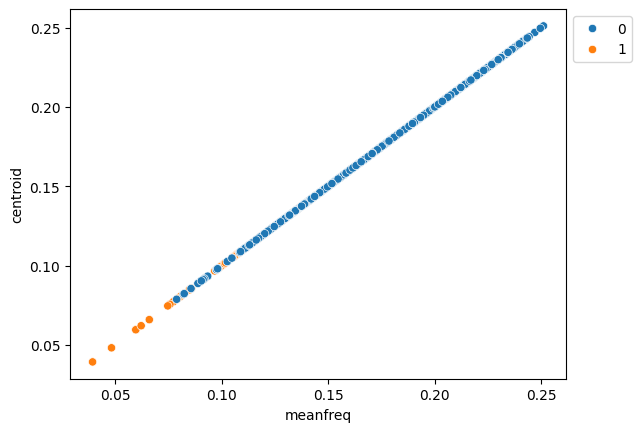

In [29]:
#0 - female; 1- male
sns.scatterplot(x='meanfreq', y='centroid',hue='label', data=df,marker='o')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

##### Histograms on all the features, over every class

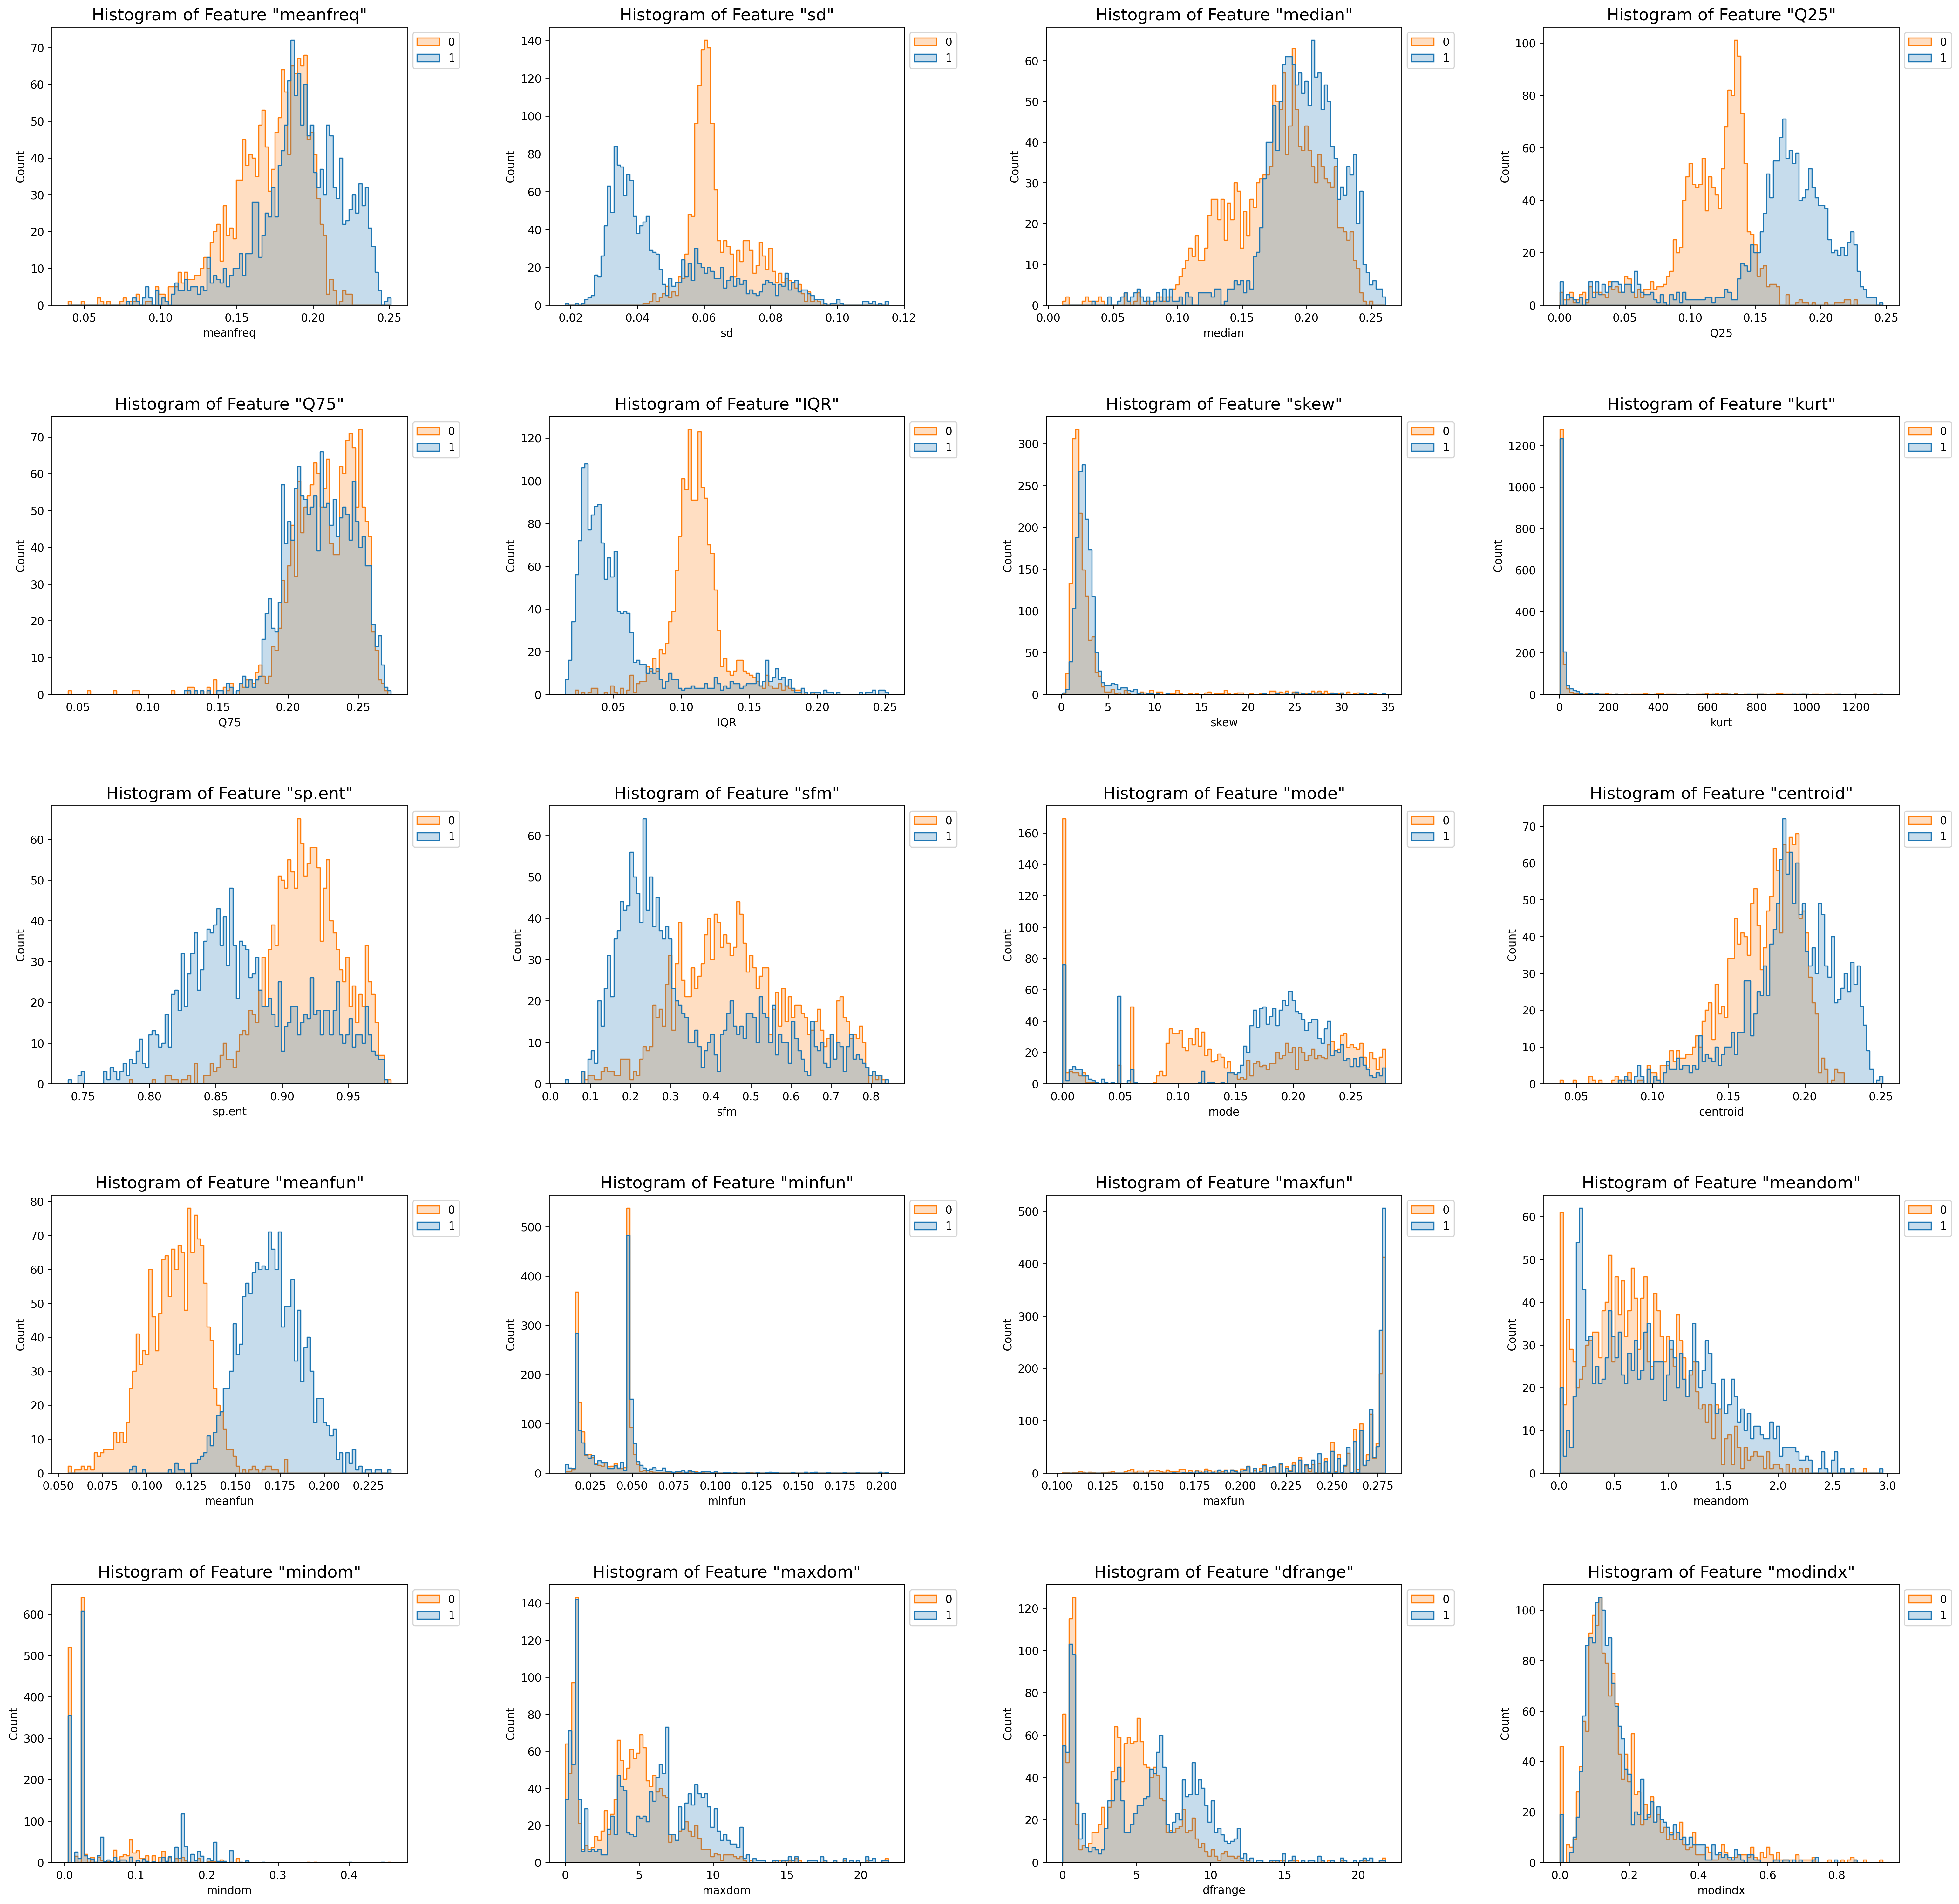

In [30]:
fig, axes = plt.subplots(5, 4, figsize=(30,30),dpi=250)
fig.subplots_adjust(wspace=0.4, hspace=0.4)
column = 0

for i in range(len(axes)):
    for j in range(len(axes[i])):
        if (column == len(df.columns)):
            break
        sns.histplot(x=df.columns[column], data=df, hue='label', bins=100,
                    ax=axes[i,j], element='step', discrete=False)
        axes[i,j].set_title(f'Histogram of Feature "{df.columns[column]}"', fontsize=15)
        axes[i,j].legend(df['label'].unique()[::-1], bbox_to_anchor=(1, 1), loc=2)
        column += 1

##### Heatmap (illustrating correlation between various features)

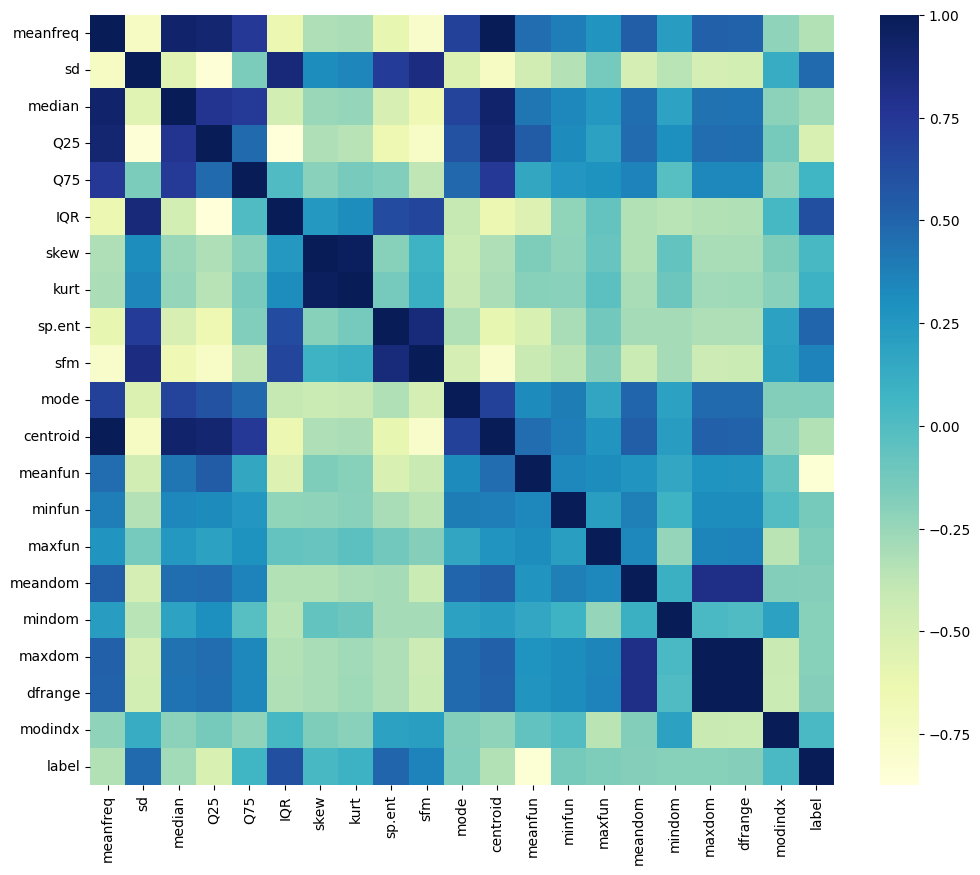

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(method='pearson'), cmap='YlGnBu')
plt.show()

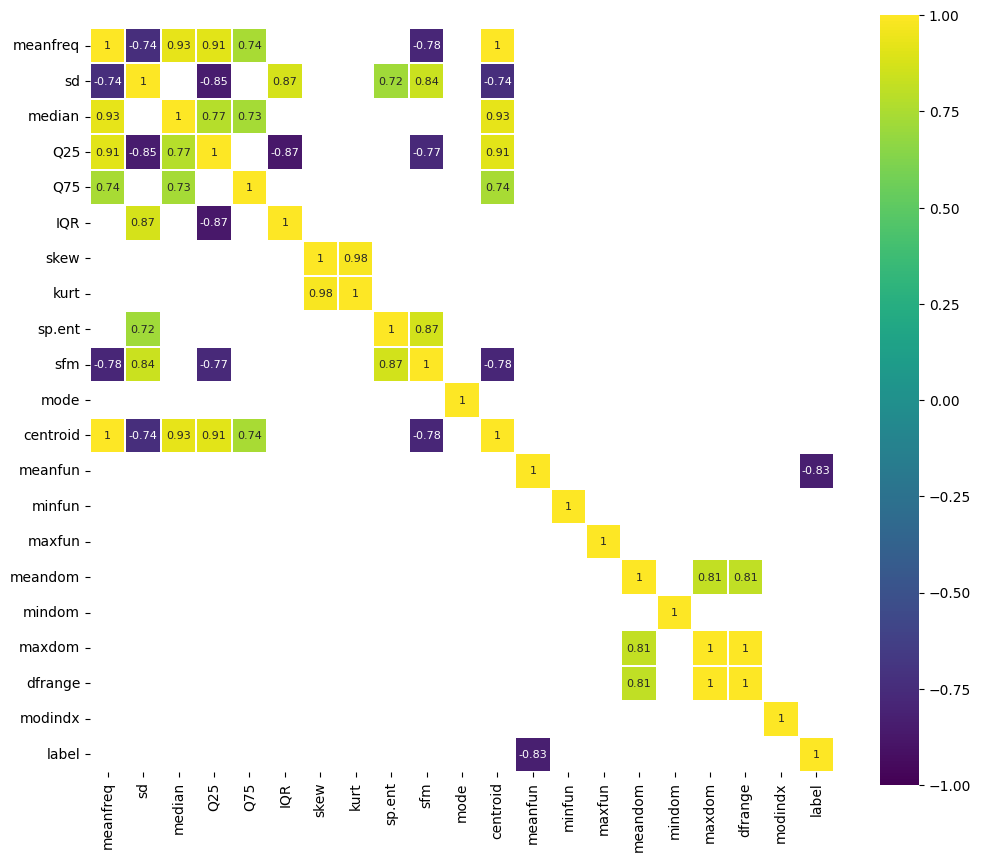

In [34]:
corr = df.corr()
plt.figure(figsize=(12, 10))

threshold_corr = 0.7
fig = sns.heatmap(corr[(corr >= threshold_corr) | (corr <= -threshold_corr)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [35]:
corr[(corr>0.2) | (corr<-0.2)]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,NaN,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,NaN,-0.482726,-0.357667,-0.482278,-0.475999,NaN,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,NaN,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,NaN,0.467403,0.302255,0.459683,0.454394,NaN,-0.511455
Q75,0.740997,NaN,0.731849,0.477140,1.000000,NaN,-0.206339,NaN,NaN,-0.378198,...,0.740997,NaN,0.258002,0.285584,0.359181,NaN,0.335114,0.335648,-0.216475,NaN
IQR,-0.627605,0.874660,-0.477352,-0.874189,NaN,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,NaN,-0.333362,-0.357037,-0.337877,-0.331563,NaN,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,NaN,NaN,...,-0.322327,NaN,-0.216954,NaN,-0.336848,NaN,-0.305651,-0.304640,NaN,NaN
kurt,-0.316036,0.346241,-0.243382,-0.350182,NaN,0.316185,0.977020,1.000000,NaN,NaN,...,-0.316036,NaN,-0.203201,NaN,-0.303234,NaN,-0.274500,-0.272729,-0.205539,NaN
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,NaN,0.640813,NaN,NaN,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,NaN,-0.293562,-0.294869,-0.324253,-0.319054,NaN,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,NaN,NaN,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,NaN,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


##### Boxplots on all the features (denoting the outliers in each feature)

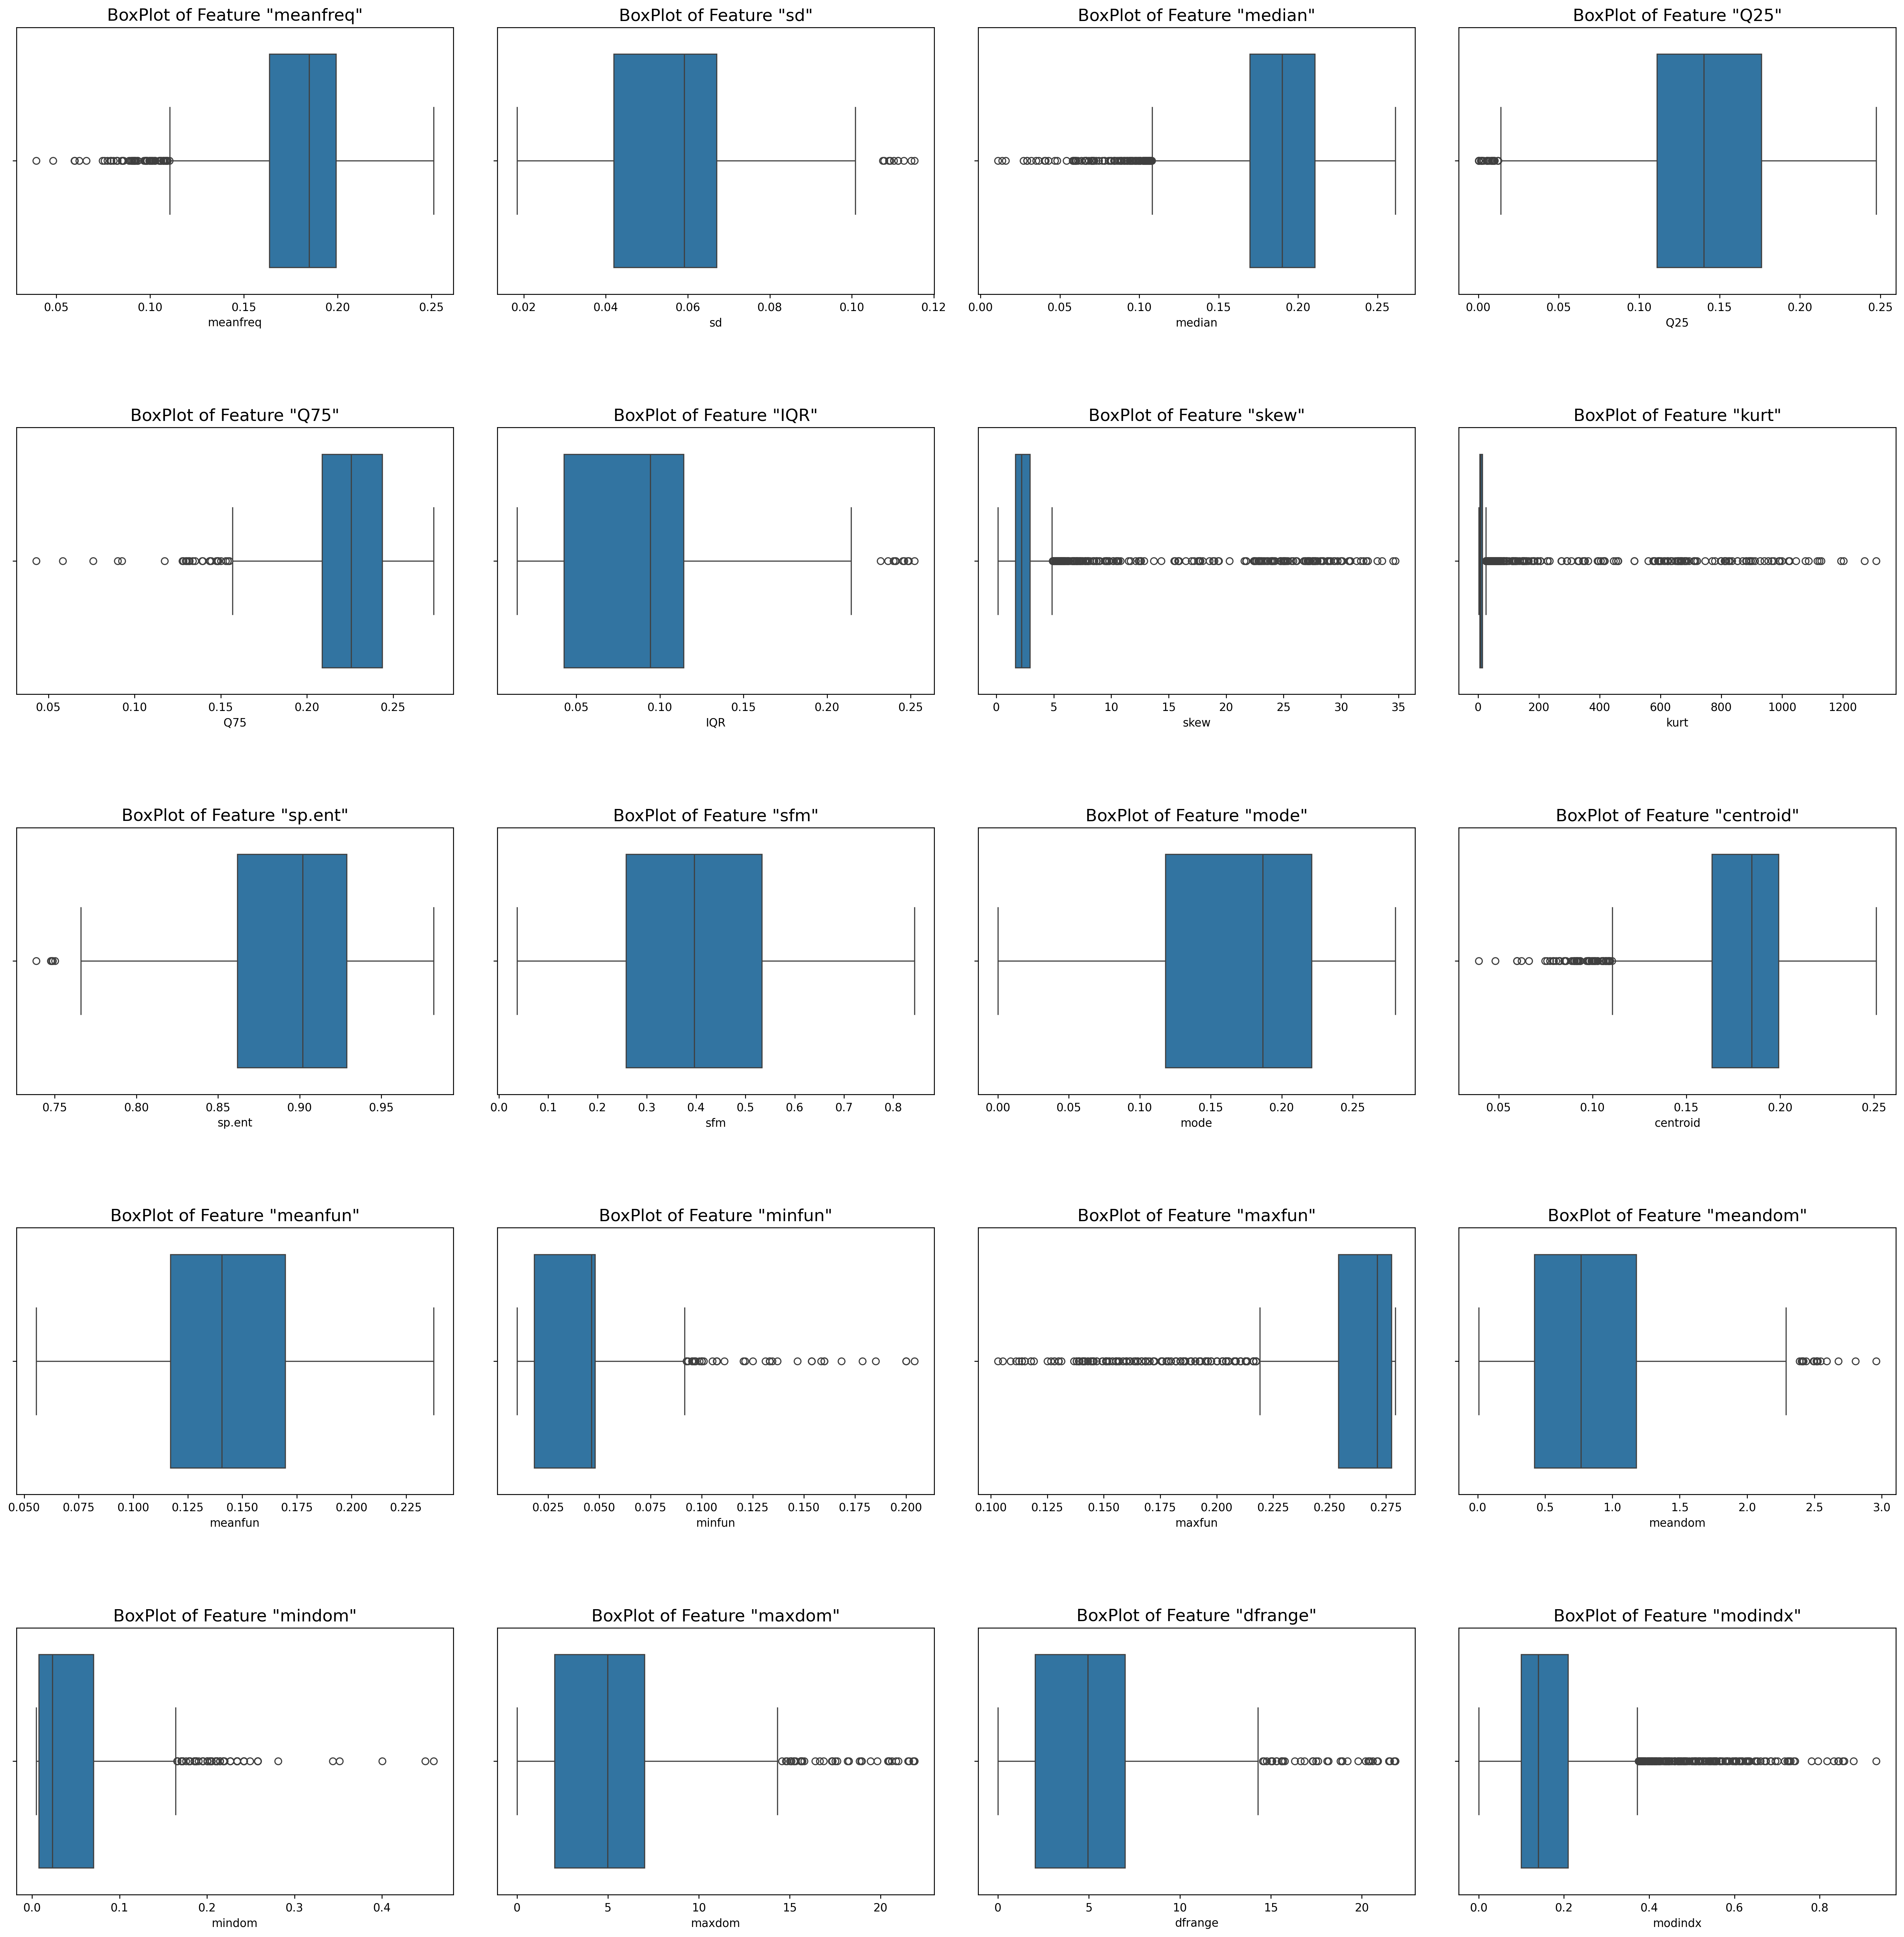

In [36]:
fig, axes = plt.subplots(5, 4, figsize=(30,30),dpi=250)
fig.subplots_adjust(wspace=0.1, hspace=0.5)
column = 0

for i in range(len(axes)):
    for j in range(len(axes[i])):
        if (column == len(df.columns)-1):
            break
        sns.boxplot(x=df.columns[column], data=df, ax=axes[i,j])   # outlier
        axes[i,j].set_title(f'BoxPlot of Feature "{df.columns[column]}"', fontsize=15)
        column += 1

##### Pairplot on the entire Dataset (illustrating correlation b/w every pair of features )

In [37]:
figure_ = sns.pairplot(data=df, hue='label', markers='+');

Output hidden; open in https://colab.research.google.com to view.

##### Checking Missing values in Dataset

In [38]:
print("Count of null values in each feature/column:")
df.isnull().sum()

Count of null values in each feature/column:


,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


#### TSNE on the given Dataset

In [39]:
from sklearn.manifold import TSNE

In [40]:
x = df.drop('label', axis=1)
y = df['label']

model = TSNE(n_components=2, random_state=49)
TSNE_Dataset = model.fit_transform(x)

tsne_data = pd.DataFrame(data=TSNE_Dataset, columns=['Dimension 1','Dimension 2'])
tsne_data['label'] = df['label']

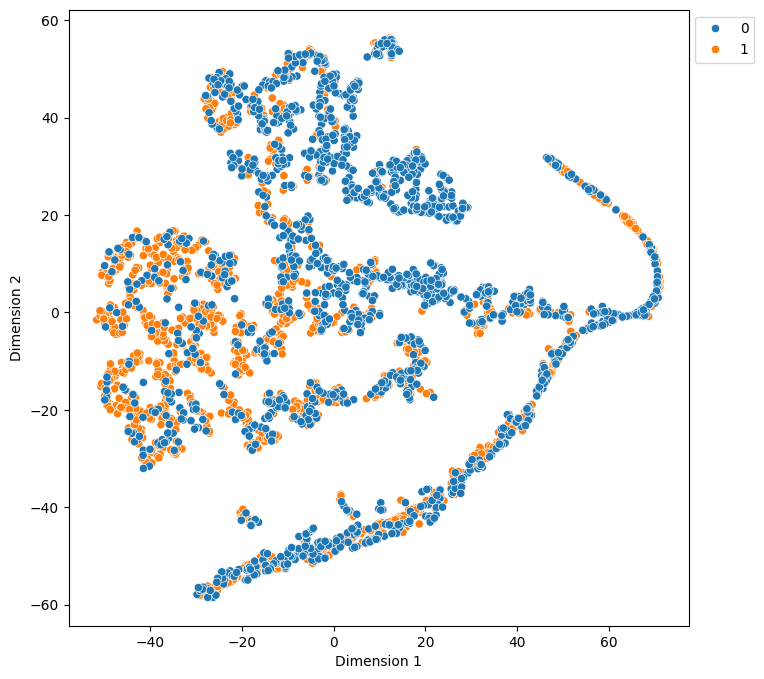

In [42]:
plt.figure(figsize=(8,8));
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='label', data=tsne_data)
plt.legend(bbox_to_anchor=(1, 1), loc=2);

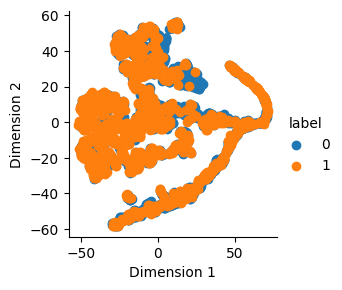

In [43]:
sns.FacetGrid(tsne_data, hue="label").map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend();

### Feature Importance Graph

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [46]:
df = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/assests/voice.csv')
x = df.drop('label', axis=1)
y = df['label']

feature_names = df.columns[:-1]

for feature_name in feature_names:
    df[feature_name] = df[feature_name] / df[feature_name].std()

In [47]:
x = df[feature_names].values
y = df['label']

model = LogisticRegression()
model.fit(x, y)
score = model.score(x, y)
print(score)

0.9750631313131313


In [48]:
print(len(feature_names))

20


In [49]:
w0 = model.intercept_[0]

w = model.coef_[0]
w

array([-0.05548945,  0.19970799, -0.19135184, -0.88503542,  0.5803243 ,
        1.32766865, -0.24644589, -0.38055293,  1.00560105, -1.41354625,
        0.19610731, -0.05548945, -5.03857482,  0.62463636, -0.06520151,
        0.03317342, -0.03801362, -0.02568614, -0.02501071, -0.39394612])

In [50]:
equation = f"{w0}"
for i in range(w.shape[0]):
    equation += f" + ({w[i]} * x{i+1})"

equation

'-0.022357488037346003 + (-0.05548945411710138 * x1) + (0.19970799357723487 * x2) + (-0.19135184344999612 * x3) + (-0.8850354177999661 * x4) + (0.5803242992575368 * x5) + (1.3276686549766512 * x6) + (-0.24644588888355182 * x7) + (-0.3805529303283217 * x8) + (1.005601047706702 * x9) + (-1.4135462480642964 * x10) + (0.19610730859783929 * x11) + (-0.05548945411710138 * x12) + (-5.038574815312219 * x13) + (0.6246363615931851 * x14) + (-0.06520151372522387 * x15) + (0.033173420558194874 * x16) + (-0.03801362205400138 * x17) + (-0.02568614104526243 * x18) + (-0.025010711508619842 * x19) + (-0.3939461168113147 * x20)'

In [51]:
idx = 99
x = df.iloc[idx][feature_names].values
y = model.predict_proba(x.reshape(1, -1))[0]
print(y[1])

0.9967100724077848


In [52]:
import math
def sigmoid(x):
    return 1 / (1 + pow(math.e, -x))

result = w0
for i in range(0, 4):
    result += x[i] * w[i]
result = sigmoid(result)
print(result)

0.5065747343720979


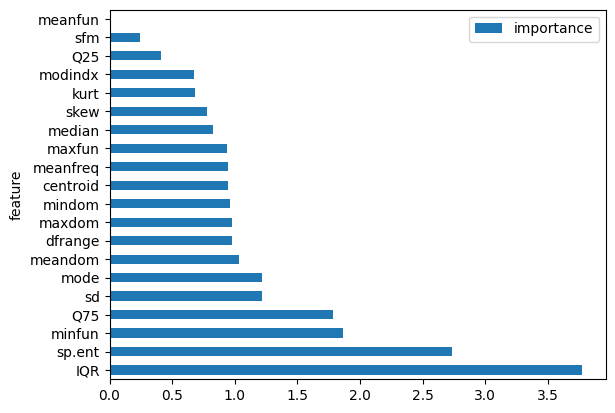

In [53]:
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()